In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from time import time

In [38]:
pd.set_option('mode.chained_assignment', None)

In [39]:
Ip2=pd.read_csv("D:\SHOBHIT_MANIAR_387777\lp22.csv") 
dfnew2=Ip2[["Unnamed: 1","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6"]].copy()
df2=dfnew2.dropna()
df2["F_vec"]=np.sqrt((df2["Unnamed: 1"]**2+df2["Unnamed: 2"]**2+df2["Unnamed: 3"]**2))
df2["T_vec"]=np.sqrt((df2["Unnamed: 4"]**2+df2["Unnamed: 5"]**2+df2["Unnamed: 6"]**2))
df22=Ip2["dummy"]

In [40]:
df2=df2.reset_index(drop=True)
df2=df2.groupby(np.arange(len(df2))//15).mean()

df21=df22.dropna().reset_index(drop=True)

In [41]:
df2["Classes"]=df21
df2main=df2[["Classes","F_vec","T_vec"]].copy()

normal       20
left_col      9
back_col      7
front_col     6
right_col     5
Name: Classes, dtype: int64


array([[<AxesSubplot:title={'center':'back_col'}>,
        <AxesSubplot:title={'center':'front_col'}>],
       [<AxesSubplot:title={'center':'left_col'}>,
        <AxesSubplot:title={'center':'normal'}>],
       [<AxesSubplot:title={'center':'right_col'}>, <AxesSubplot:>]],
      dtype=object)

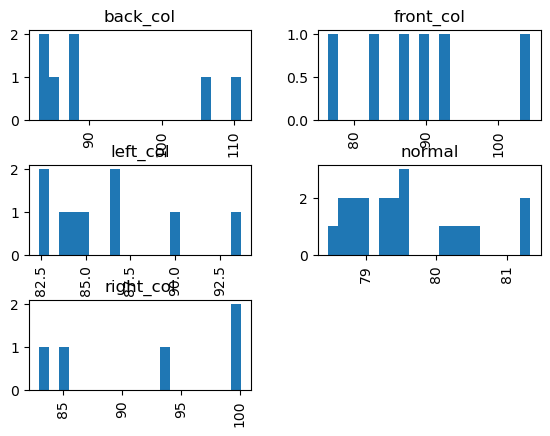

In [42]:
print(df2main['Classes'].value_counts())
df2main.hist(column='F_vec', bins=20, by='Classes')

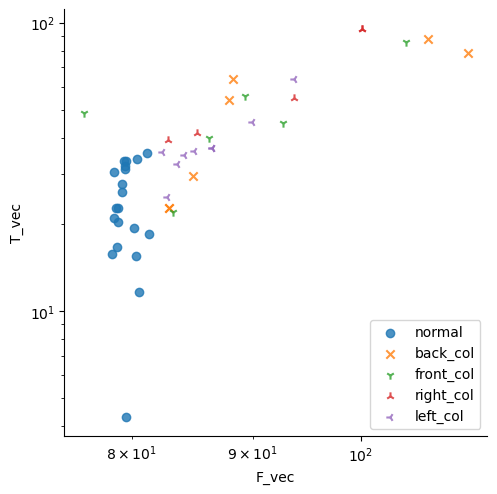

In [43]:
import seaborn as sns
grid=sns.lmplot( x="F_vec", y="T_vec", data=df2main, fit_reg=False, hue="Classes", legend=False, markers=["o", "x", "1","2","3"])
plt.legend(loc='lower right')
grid.set(xscale="log", yscale="log")
plt.show()

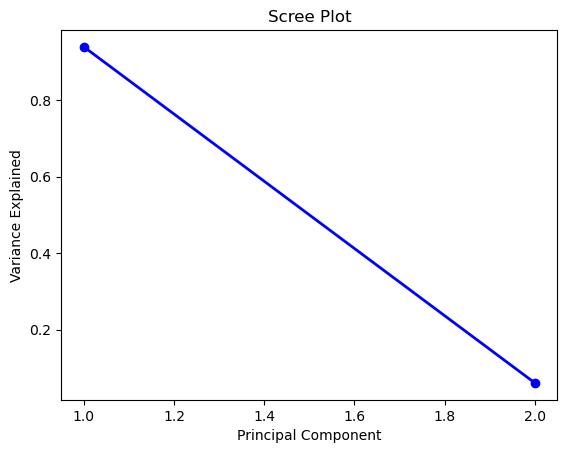

[0.9388281 0.0611719]


In [44]:
df2_pca=df2main.iloc[:,1:3]
scaler = StandardScaler()
df2_pca=pd.DataFrame(scaler.fit_transform(df2_pca))
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df2_pca)
pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(pca.explained_variance_ratio_)

In [45]:
data_fin = pd.DataFrame( columns = [ 'pca1','class'])
data_fin['pca1'] = pca_df['PC1']
data_fin['class'] = df2["Classes"]

In [46]:
from sklearn import preprocessing
e=preprocessing.LabelEncoder()
Y=e.fit_transform(df2.Classes)
X=df2.iloc[:,0:6].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
ann = tf.keras.models.Sequential()

In [48]:
keras = tf.keras
ann.add(tf.keras.layers.Dense(units=100,activation=keras.layers.LeakyReLU(alpha=0.001)))

In [49]:
ann.add(tf.keras.layers.Dense(units=5,activation="softmax"))

In [50]:
ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [51]:
start = time()
ann.fit(X_train,Y_train,batch_size=9,epochs = 100)
print(time()-start)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 1.6685 - accuracy: 0.2703
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.6173 - accuracy: 0.3514
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 1.5750 - accuracy: 0.3514
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 1.5366 - accuracy: 0.3784
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 1.5039 - accuracy: 0.3784
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 1.4742 - accuracy: 0.5135
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 1.4493 - accuracy: 0.5405
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 1.4214 - accuracy: 0.6486
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 1.3987 - accuracy: 0.6486
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3758 - accuracy: 0.6216
Epoch 11/100
5/5 [===========

In [52]:
y_pred=ann.predict(X_test)
a=np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 39ms/step


In [53]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,a)
print(accuracy)

0.9


C:\Users\Shobhit\AppData\Local\Temp\ipykernel_12020\1635849963.py:4: RuntimeWarning: invalid value encountered in true_divide
  sns.heatmap((cf_matrix.T/cf_matrix.sum(axis=1)).T, annot=True, fmt='.2%', cbar=False,cmap='Blues')


<AxesSubplot:>

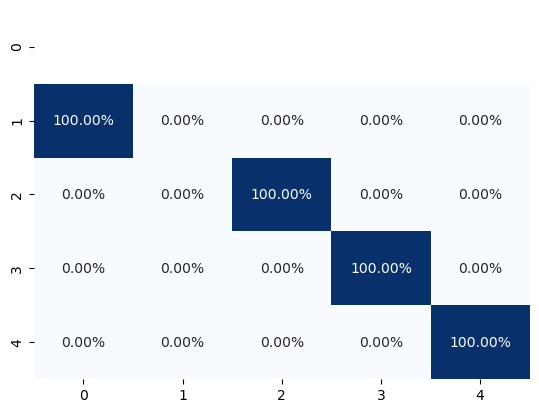

In [54]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, a)
#plot_confusion_matrix
sns.heatmap((cf_matrix.T/cf_matrix.sum(axis=1)).T, annot=True, fmt='.2%', cbar=False,cmap='Blues')
